In [50]:
import utils
import numpy as np

import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

%matplotlib inline


from sklearn.decomposition import PCA

## Analysis of https://gdc.xenahubs.net/download/TCGA-BRCA/Xena_Matrices/TCGA-BRCA.htseq_counts.tsv.gz

In [ ]:
def read_merged(path):
    X_gtex = pd.read_csv(os.path.join(path,"gtex.txt"), sep="\t")
    X_gtex = X_gtex.set_index("Hugo_Symbol").drop("Entrez_Gene_Id", axis=1).T
    
    gene_names = X_gtex.columns.tolist()
    
    X_gtex['source'] = "GTEx"
    X_normal = pd.read_csv(os.path.join(path,"normal.txt"), sep="\t")
    X_normal = X_normal.set_index("Hugo_Symbol").drop("Entrez_Gene_Id", axis=1).T
    X_normal['source'] = "normal"
    X_tumor = pd.read_csv(os.path.join(path,"tumor.txt"), sep="\t")
    X_tumor = X_tumor.set_index("Hugo_Symbol").drop("Entrez_Gene_Id", axis=1).T
    X_tumor['source'] = "tumor"
    
    return pd.concat([X_gtex, X_normal, X_tumor], axis=0)[['source'] + gene_names]

In [ ]:
X=read_merged("/home/nanni/Data/TCGA/CIBB/aggregates/BRCA_tcga_gtex/")

In [ ]:
X.source.value_counts()

In [ ]:
pca = PCA(n_components=20)
X_t = pca.fit_transform(X.drop('source', axis=1).as_matrix())

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
colormap = {
    'GTEx' : 'green',
    'tumor': 'blue',
    'normal': 'green'
}

In [ ]:
labels = X.source.values

In [ ]:
colors = list(map(lambda x: colormap[x], labels))

In [ ]:
sns.regplot(x=X_t[:, 0], y=X_t[:, 1], fit_reg=False, scatter_kws={'color': colors, 'alpha': 0.5} )

## TCGA vs GTEx

### GTEx

In [2]:
gtex = pd.read_csv("/home/nanni/Data/GTEx/V7/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_reads.gct", sep="\t", skiprows=2)
gtex

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972.4,DDX11L1,3,4,1,1,0,2,1,3,...,5,9,4,0,27,24,5,22,11,6
1,ENSG00000227232.4,WASH7P,616,395,826,364,301,419,340,451,...,226,839,220,252,358,281,530,686,389,548
2,ENSG00000243485.2,MIR1302-11,2,1,1,0,1,0,2,3,...,2,1,0,2,0,1,1,0,1,1
3,ENSG00000237613.2,FAM138A,1,0,1,1,0,0,2,3,...,0,3,2,1,0,2,0,2,1,1
4,ENSG00000268020.2,OR4G4P,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,2,0,0,1
5,ENSG00000240361.1,OR4G11P,0,2,2,0,0,1,0,0,...,2,2,1,0,0,0,1,0,1,0
6,ENSG00000186092.4,OR4F5,0,0,0,0,2,0,0,0,...,0,2,1,0,0,0,1,0,2,0
7,ENSG00000238009.2,RP11-34P13.7,8,3,12,12,2,4,10,9,...,6,58,20,4,23,6,15,4,5,7
8,ENSG00000233750.3,CICP27,11,29,9,18,5,5,7,4,...,28,175,139,7,85,30,560,21,173,144
9,ENSG00000237683.5,AL627309.1,264,300,114,1364,227,276,518,52,...,4801,13955,10941,1808,16394,2194,10905,2716,10052,12504


In [3]:
gtex_meta = pd.read_csv("/home/nanni/Data/GTEx/V7/GTEx_v7_Annotations_SampleAttributesDS.txt", sep="\t")
gtex_meta.head()

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
0,GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GTEX-1117F-0003-SM-6WBT7,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GTEX-1117F-0226-SM-5GZZ7,0.0,B1,"2 pieces, ~15% vessel stroma, rep delineated",6.8,Adipose Tissue,Adipose - Subcutaneous,0002190,1214.0,1125.0,...,14579275.0,12025354.0,0.003164,14634407.0,50.094357,0.003102,0.992826,NaN,0.0,50.12628
4,GTEX-1117F-0426-SM-5EGHI,0.0,B1,"2 pieces, !5% fibrous connective tissue, delin...",7.1,Muscle,Muscle - Skeletal,0011907,1220.0,1119.0,...,13134349.0,11578874.0,0.003991,13307871.0,50.328114,0.006991,0.994212,NaN,0.0,49.90517


In [5]:
selected_cancer = "Breast"
selected_patients = gtex_meta[gtex_meta.SMTS == selected_cancer].SAMPID.tolist()

In [7]:
gtex = gtex.set_index("Name").drop("Description", axis=1).T

In [8]:
gtex_selected = gtex.loc[gtex.index.intersection(selected_patients)]

In [32]:
sample_sums = gtex_selected.sum(1)
gtex_selected_norm = gtex_selected.divide(sample_sums, axis=0)

### TCGA

In [4]:
tcga = pd.read_csv("/home/nanni/Data/TCGA/Xena/TCGA-BRCA.htseq_counts.tsv", sep="\t")
tcga.head()

,Ensembl_ID,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5L-AAT1-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,...,TCGA-UL-AAZ6-01A,TCGA-UU-A93S-01A,TCGA-V7-A7HQ-01A,TCGA-W8-A86G-01A,TCGA-WT-AB41-01A,TCGA-WT-AB44-01A,TCGA-XX-A899-01A,TCGA-XX-A89A-01A,TCGA-Z7-A8R5-01A,TCGA-Z7-A8R6-01A
0,ENSG00000000003.13,9.348728,8.714246,10.356452,11.540612,11.331477,11.495355,9.861087,10.624795,12.029632,...,9.879583,8.459432,11.167418,12.267957,10.578373,9.489848,11.029977,10.812979,11.323055,11.084144
1,ENSG00000000005.5,1.584963,1.584963,5.727920,2.321928,4.000000,2.584963,2.000000,1.000000,9.255029,...,1.000000,5.209453,2.584963,4.321928,4.247928,4.643856,4.459432,10.002815,3.584963,3.000000
2,ENSG00000000419.11,10.874981,10.834471,10.329796,10.440869,10.493855,9.848623,9.870365,11.115044,10.228819,...,10.183635,10.361944,9.469642,10.564149,9.659996,9.276124,10.636625,10.253847,10.174926,11.125413
3,ENSG00000000457.12,10.121534,11.512247,8.867279,10.648358,10.259743,9.695228,9.900867,10.462502,10.233620,...,10.358651,10.327553,8.603626,10.762382,8.797662,9.957102,10.785452,10.163650,9.971544,10.606405
4,ENSG00000000460.15,8.599913,9.098032,8.124121,9.049849,8.703904,8.204571,7.459432,9.103288,8.566054,...,8.951285,9.247928,6.554589,8.724514,6.794416,7.531381,8.800900,8.936638,7.409391,10.503826


In [42]:
intersecting_genes = list(set(gtex_selected_norm.columns).intersection(set(tcga_count_norm.columns)))

In [33]:
tcga = tcga.set_index("Ensembl_ID").T

In [35]:
tcga_count = tcga.applymap(lambda x: 2**x - 1)

In [84]:
tcga_count_intergenes_norm = tcga_count[intersecting_genes]
tcga_count_intergenes_norm = tcga_count_intergenes_norm.divide(tcga_count_intergenes_norm.sum(1), axis=0)

In [85]:
gtex_selected_intergenes_norm = gtex_selected[intersecting_genes]
gtex_selected_intergenes_norm = gtex_selected_intergenes_norm.divide(gtex_selected_intergenes_norm.sum(1), axis=0)

In [38]:
tcga_count_norm = tcga_count.divide(tcga_count.sum(1), axis=0)

## PCA

In [44]:
tcga_count_norm_intergenes = tcga_count_norm[intersecting_genes]
gtex_selected_norm_intergenes = gtex_selected_norm[intersecting_genes]

In [68]:
tcga_count_norm_intergenes['source'] = tcga_count_norm_intergenes.index.map(lambda x: "tcga_normal" if int(x.split("-")[-1][:-1]) > 10 else "tcga_tumor").tolist()
gtex_selected_norm_intergenes['source'] = 'GTEx'

/home/nanni/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nanni/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
tcga_count_intergenes_norm['source'] = tcga_count_intergenes_norm.index.map(lambda x: "tcga_normal" if int(x.split("-")[-1][:-1]) > 10 else "tcga_tumor").tolist()
gtex_selected_intergenes_norm['source'] = 'GTEx'

In [99]:
tcga_gtex = pd.concat([tcga_count[intersecting_genes], gtex_selected[intersecting_genes]], axis=0)

In [89]:
colormap = {
    'tcga_tumor': 'red',
    'tcga_normal': 'green',
    'GTEx': 'blue'
}

In [93]:
scaler = MinMaxScaler()

In [94]:
tcga_gtex_s = scaler.fit_transform(tcga_gtex.drop('source', axis=1).T).T

In [90]:
colors = list(map(lambda x: colormap[x], tcga_gtex.source.tolist()))

In [103]:
tcga_gtex

,ENSG00000250040.2,ENSG00000261786.1,ENSG00000255140.1,ENSG00000264073.1,ENSG00000207394.1,ENSG00000200997.1,ENSG00000258076.1,ENSG00000227150.1,ENSG00000269352.1,ENSG00000210191.1,...,ENSG00000254255.1,ENSG00000265994.1,ENSG00000251849.1,ENSG00000203684.5,ENSG00000232420.2,ENSG00000261461.1,ENSG00000251080.1,ENSG00000272444.1,ENSG00000229931.1,ENSG00000239405.1
TCGA-3C-AAAU-01A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.0,1.0,...,0.0,0.0,0.0,10.0,1.0,33.0,0.0,41.0,119.0,48.0
TCGA-3C-AALI-01A,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,464.0,0.0,...,0.0,0.0,0.0,12.0,0.0,18.0,0.0,72.0,35.0,26.0
TCGA-3C-AALJ-01A,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,0.0,...,0.0,0.0,0.0,6.0,0.0,9.0,0.0,10.0,6.0,3.0
TCGA-3C-AALK-01A,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,239.0,0.0,...,0.0,0.0,0.0,4.0,0.0,24.0,1.0,17.0,44.0,9.0
TCGA-4H-AAAK-01A,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,...,0.0,0.0,0.0,4.0,0.0,13.0,1.0,24.0,59.0,0.0
TCGA-5L-AAT0-01A,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,1.0,...,0.0,0.0,0.0,7.0,0.0,9.0,0.0,14.0,34.0,3.0
TCGA-5L-AAT1-01A,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,97.0,0.0,...,0.0,0.0,0.0,9.0,0.0,4.0,0.0,13.0,22.0,13.0
TCGA-5T-A9QA-01A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,2.0,...,0.0,0.0,0.0,11.0,0.0,21.0,0.0,47.0,2.0,0.0
TCGA-A1-A0SB-01A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,...,0.0,0.0,0.0,8.0,0.0,11.0,0.0,25.0,68.0,0.0
TCGA-A1-A0SD-01A,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,2.0,...,0.0,0.0,0.0,5.0,0.0,33.0,1.0,37.0,57.0,130.0


In [101]:
pca = PCA(n_components=2)
tcga_gtex_t = pca.fit_transform(tcga_gtex)
pca.explained_variance_ratio_

array([0.62346931, 0.10769389])

In [95]:
pca = PCA(n_components=2)
tcga_gtex_ts = pca.fit_transform(tcga_gtex_s)
pca.explained_variance_ratio_

array([0.20732608, 0.13027796])

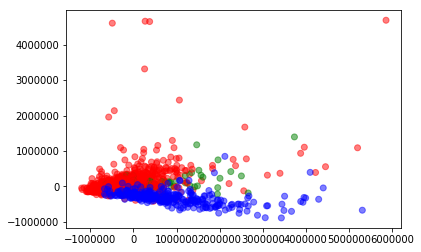

In [102]:
sns.regplot(x=tcga_gtex_t[:, 0], y=tcga_gtex_t[:, 1], fit_reg=False, scatter_kws={'color': colors, 'alpha': 0.5} )

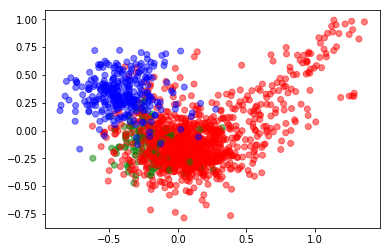

In [96]:
sns.regplot(x=tcga_gtex_ts[:, 0], y=tcga_gtex_ts[:, 1], fit_reg=False, scatter_kws={'color': colors, 'alpha': 0.5} )